### Diabetes prediction

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Program Files\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
import seaborn as sns

### 1. Dealing with missing values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 2. Numerical Variables

In [8]:
feature = [feature for feature in df.columns if df[feature].dtype!='O']
print(feature)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


So, none of the variables or columns are of object datatypes

### 3. Distribution of numerical variables

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']
print("Number of numerical variables: ",len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


There are 2 types in numerical features, now let us go through them
1. Continuous variable
2. Discrete variable

In [10]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [11]:
discrete_feature

['Pregnancies', 'Outcome']

In [12]:
df[discrete_feature].head()

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1


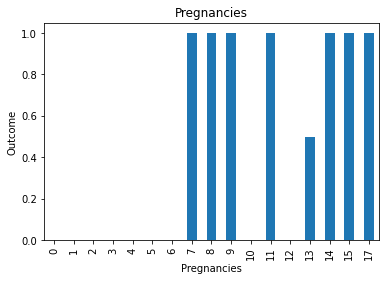

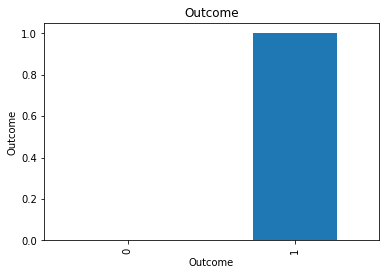

In [13]:
for feature in discrete_feature:
    data = df.copy()
    data.groupby(feature)['Outcome'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Outcome')
    plt.title(feature)
    plt.show()

In [14]:
continous_feature = [feature for feature in numerical_features if feature not in discrete_feature+['Outcome']]
print("Continuous feature Count {}".format(len(continous_feature)))

Continuous feature Count 7


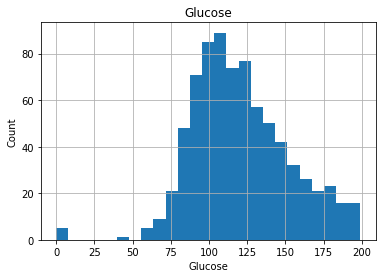

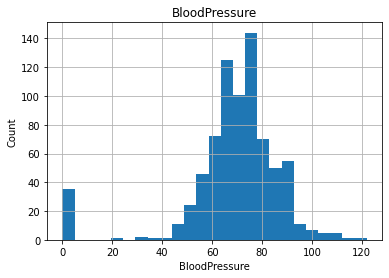

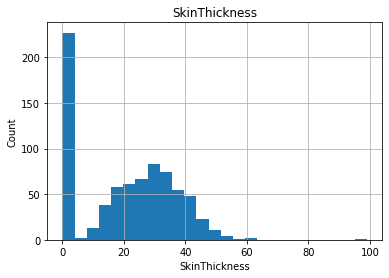

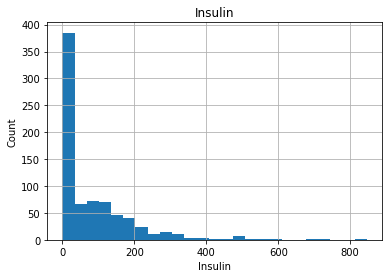

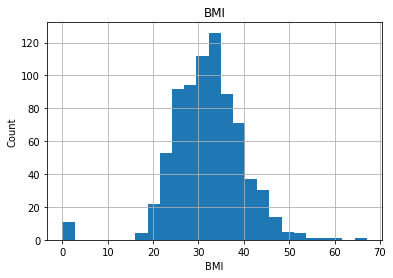

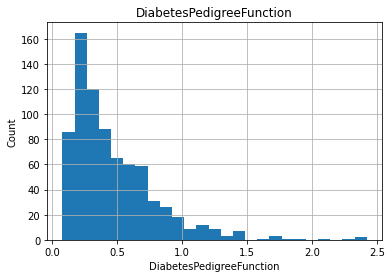

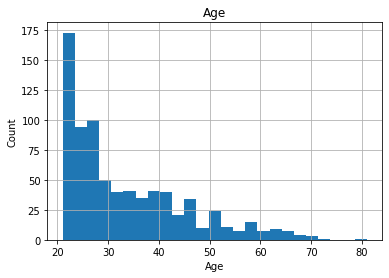

In [15]:
for feature in continous_feature:
    data = df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


C:\Users\Yogiraj\AppData\Roaming\Python\Python37\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


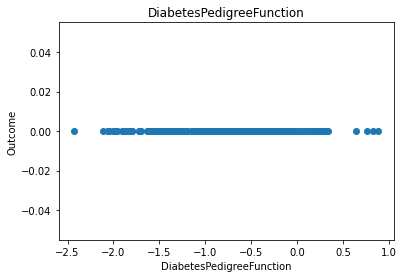

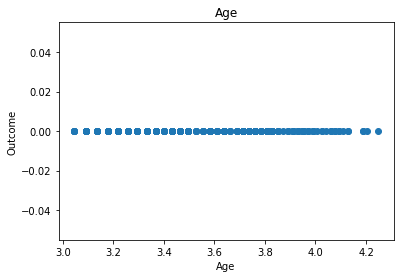

In [16]:
### Since we can see most of the data is skewed
for feature in continous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['Outcome'] = np.log(data['Outcome'])
        plt.scatter(data[feature],data['Outcome'])
        plt.xlabel(feature)
        plt.ylabel('Outcome')
        plt.title(feature)
        plt.show()

### Outliers

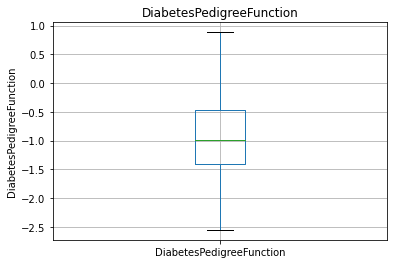

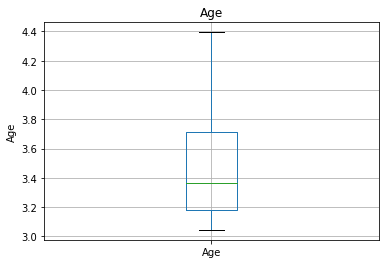

In [17]:
for feature in continous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [20]:
X = df.drop(['Outcome'],axis=1)
Y = df['Outcome']

In [21]:
feature_sel_model.fit(X,Y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [22]:
selected_feat = X.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 8
selected features: 8


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [25]:
print("X_train shape: - ",X_train.shape,"X_test shape: - ",X_test.shape,"Y_train shape: -",Y_train.shape,"Y_test shape: -",Y_test.shape)

X_train shape: -  (614, 8) X_test shape: -  (154, 8) Y_train shape: - (614,) Y_test shape: - (154,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X,Y)

LogisticRegression()

In [29]:
Y_pred = model.predict(X_test)

In [30]:
score = accuracy_score(Y_test,Y_pred)
print("Score of the model is : - ",score)

Score of the model is : -  0.8311688311688312


In [31]:
confusion_matrix(Y_test,Y_pred)

array([[99,  8],
       [18, 29]], dtype=int64)

In [32]:
print(classification_report(Y_test,Y_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.85      0.93      0.88       107
           1       0.78      0.62      0.69        47

    accuracy                           0.83       154
   macro avg       0.81      0.77      0.79       154
weighted avg       0.83      0.83      0.82       154



In [33]:
# Create hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

log_reg_grid = {"C": np.logspace(-4,4,20), "solver":["liblinear"]}

np.random.seed(42)

model1 = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

model1.fit(X_train,Y_train)
score = model1.score(X_test,Y_test)
print(score*100)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
81.16883116883116


### Save the model

In [36]:
import pickle as pkl
pkl.dump(model,open('diabetes.pkl','wb'))

In [37]:
pkl.load(open('diabetes.pkl','rb'))

LogisticRegression()